In [29]:
import pandas as pd
import numpy as np
import acquire
import matplotlib.pyplot as plt
import seaborn as sns
import wrangle
from scipy import stats

**Lets acquire data using the get_data function from acquire module**

In [30]:


zillow = acquire.get_data()

**Lets take a look at our dataframe**

In [3]:
zillow.head()

,id,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,regionidcounty,regionidzip,finishedsquarefeet12,fips,fullbathcnt,lotsizesquarefeet,propertylandusedesc,transactiondate,taxamount,taxvaluedollarcnt
0,2061546,11289917,2.0,3.0,2.0,3101.0,97318.0,1458.0,6037.0,2.0,8284.0,Single Family Residential,2017-06-23,2319.90,136104.0
1,1834372,11705026,1.0,2.0,1.0,3101.0,96018.0,1421.0,6037.0,1.0,6707.0,Single Family Residential,2017-06-30,543.69,35606.0
2,1923117,14269464,3.0,4.0,3.0,1286.0,96958.0,2541.0,6059.0,3.0,4975.0,Single Family Residential,2017-06-01,9819.72,880456.0
3,2121349,11389003,2.0,3.0,2.0,3101.0,96037.0,1650.0,6037.0,2.0,7300.0,Single Family Residential,2017-06-01,7673.19,614000.0
4,2093710,11967869,1.0,2.0,1.0,3101.0,96023.0,693.0,6037.0,1.0,2908.0,Single Family Residential,2017-06-29,3267.47,274237.0


**Getting some information about our data**

In [4]:
zillow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    15035 non-null  int64  
 1   parcelid              15035 non-null  int64  
 2   bathroomcnt           15035 non-null  float64
 3   bedroomcnt            15035 non-null  float64
 4   calculatedbathnbr     14989 non-null  float64
 5   regionidcounty        15035 non-null  float64
 6   regionidzip           15026 non-null  float64
 7   finishedsquarefeet12  14968 non-null  float64
 8   fips                  15035 non-null  float64
 9   fullbathcnt           14989 non-null  float64
 10  lotsizesquarefeet     14931 non-null  float64
 11  propertylandusedesc   15035 non-null  object 
 12  transactiondate       15035 non-null  object 
 13  taxamount             15035 non-null  float64
 14  taxvaluedollarcnt     15035 non-null  float64
dtypes: float64(11), int

**Takeaways:**
- shape = 15035, 15
- some null values
- few object type that might need conversion

## Preparation Phase

In [5]:
zillow.isnull().sum()

id                        0
parcelid                  0
bathroomcnt               0
bedroomcnt                0
calculatedbathnbr        46
regionidcounty            0
regionidzip               9
finishedsquarefeet12     67
fips                      0
fullbathcnt              46
lotsizesquarefeet       104
propertylandusedesc       0
transactiondate           0
taxamount                 0
taxvaluedollarcnt         0
dtype: int64

In [6]:
# both fullbathcnt and calculatedbathnbr have 46 missing values, lets see if they are for same observations


zillow.sort_values(by = 'calculatedbathnbr')

,id,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,regionidcounty,regionidzip,finishedsquarefeet12,fips,fullbathcnt,lotsizesquarefeet,propertylandusedesc,transactiondate,taxamount,taxvaluedollarcnt
3204,1168826,11953003,1.0,2.0,1.0,3101.0,96020.0,1111.0,6037.0,1.0,5500.0,Single Family Residential,2017-05-15,9481.16,785168.0
1845,2209522,11004062,1.0,1.0,1.0,3101.0,96284.0,806.0,6037.0,1.0,2180.0,Single Family Residential,2017-05-09,2621.84,213202.0
4044,82781,12627622,1.0,1.0,1.0,3101.0,96228.0,1182.0,6037.0,1.0,5238.0,Single Family Residential,2017-05-18,580.38,40747.0
9511,347177,11556773,1.0,2.0,1.0,3101.0,96015.0,1024.0,6037.0,1.0,6185.0,Single Family Residential,2017-06-12,10741.30,890558.0
12536,2762337,11456378,1.0,2.0,1.0,3101.0,96026.0,696.0,6037.0,1.0,5548.0,Single Family Residential,2017-06-23,923.48,63322.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13790,1749638,11640641,0.0,0.0,NaN,3101.0,96086.0,NaN,6037.0,NaN,19837.0,Single Family Residential,2017-06-28,25594.26,2077940.0
13828,1983520,11486198,0.0,0.0,NaN,3101.0,96124.0,NaN,6037.0,NaN,NaN,Single Family Residential,2017-06-29,10627.31,900820.0
14505,2377279,12074776,0.0,0.0,NaN,3101.0,96327.0,360.0,6037.0,NaN,2007.0,Single Family Residential,2017-06-30,150.58,11089.0
14964,1238158,17061409,0.0,3.0,NaN,2061.0,97113.0,1760.0,6111.0,NaN,12200.0,Single Family Residential,2017-06-30,949.26,80303.0


In [7]:
# turns out they are so we can drop these observations

zillow = zillow[~zillow.fullbathcnt.isna()]

In [8]:
zillow.isnull().sum()

# lets drop null observations for finishedsquarefeet12 columns

zillow = zillow[~zillow.finishedsquarefeet12.isna()]

zillow.sort_values(by = 'lotsizesquarefeet', ascending = False).tail(50)


# imputing value for lotsizesquare using mode, median or average will affect the data as they come out to be hight

# so we will just drop them


zillow = zillow[~zillow.lotsizesquarefeet.isna()]

In [9]:
zillow = zillow[~zillow.regionidzip.isna()]

In [10]:
zillow.isnull().sum()

id                      0
parcelid                0
bathroomcnt             0
bedroomcnt              0
calculatedbathnbr       0
regionidcounty          0
regionidzip             0
finishedsquarefeet12    0
fips                    0
fullbathcnt             0
lotsizesquarefeet       0
propertylandusedesc     0
transactiondate         0
taxamount               0
taxvaluedollarcnt       0
dtype: int64

In [11]:
print(len(zillow))

print((zillow.bathroomcnt == zillow.calculatedbathnbr).sum())

# basically number of bathrooms and calculatedbathnbr mean the same thing so we can drop one of these column

14849
14849


In [12]:
# since all of these observations are for single family home, and their transaction took place between the month of may and
# june of 2017. We can drop these columns. Also, they wont mean anything to our model and id is also not a significant columns for us



zillow = zillow.drop(columns = ['propertylandusedesc', 'fullbath','transactiondate', 'parcelid', 'id', 'calculatedbathnbr'])

In [13]:
# renaming the column for more readeability

zillow = zillow.rename(columns = {'bathroomcnt':'numberofbathrooms', 'bedroomcnt':'numberofbedrooms', 
                         'regionidcounty':'countyid', 'regionidzip':'zipcode', 'finishedsquarefeet12':'size_in_squarefeet', 
                        'fullbathcnt':'fullbath', 'lotsizesquarefeet':'lotsize', 'taxamount': 'tax', 
                        'taxvaluedollarcnt':'property_value'})

In [14]:
zillow

,numberofbathrooms,numberofbedrooms,countyid,zipcode,size_in_squarefeet,fips,fullbath,lotsize,tax,property_value
0,2.0,3.0,3101.0,97318.0,1458.0,6037.0,2.0,8284.0,2319.90,136104.0
1,1.0,2.0,3101.0,96018.0,1421.0,6037.0,1.0,6707.0,543.69,35606.0
2,3.0,4.0,1286.0,96958.0,2541.0,6059.0,3.0,4975.0,9819.72,880456.0
3,2.0,3.0,3101.0,96037.0,1650.0,6037.0,2.0,7300.0,7673.19,614000.0
4,1.0,2.0,3101.0,96023.0,693.0,6037.0,1.0,2908.0,3267.47,274237.0
...,...,...,...,...,...,...,...,...,...,...
15030,3.0,5.0,1286.0,97018.0,2526.0,6059.0,3.0,7800.0,5718.72,458903.0
15031,3.0,5.0,1286.0,97067.0,2735.0,6059.0,3.0,7100.0,1465.88,115387.0
15032,2.0,3.0,3101.0,96523.0,1536.0,6037.0,2.0,8818.0,3519.78,297097.0
15033,3.0,5.0,1286.0,97065.0,2655.0,6059.0,3.0,6000.0,8065.50,746963.0


In [15]:
zillow['tax_rate'] = (zillow.tax/zillow.property_value) * 100

zillow.sort_values(by = 'tax_rate', ascending = False)

,numberofbathrooms,numberofbedrooms,countyid,zipcode,size_in_squarefeet,fips,fullbath,lotsize,tax,property_value,tax_rate
9762,1.0,2.0,3101.0,96023.0,572.0,6037.0,1.0,2968.0,9544.07,21074.0,45.288365
1123,1.0,3.0,2061.0,97089.0,1504.0,6111.0,1.0,96658.0,17582.50,59629.0,29.486491
3477,2.0,3.0,3101.0,96361.0,1186.0,6037.0,2.0,9464.0,13096.41,47163.0,27.768399
7895,2.0,3.0,3101.0,96523.0,1754.0,6037.0,2.0,12027.0,11541.02,56697.0,20.355610
5553,2.0,3.0,3101.0,96486.0,1488.0,6037.0,2.0,8451.0,24234.62,132742.0,18.256935
...,...,...,...,...,...,...,...,...,...,...,...
5312,2.0,3.0,1286.0,96964.0,1185.0,6059.0,2.0,6250.0,1008.26,588818.0,0.171235
4539,2.0,3.0,3101.0,96436.0,1372.0,6037.0,2.0,7560.0,120.84,81141.0,0.148926
3403,1.0,2.0,3101.0,96127.0,936.0,6037.0,1.0,5750.0,963.15,866785.0,0.111118
11026,3.0,3.0,3101.0,96030.0,2178.0,6037.0,3.0,6341.0,1928.38,1800000.0,0.107132


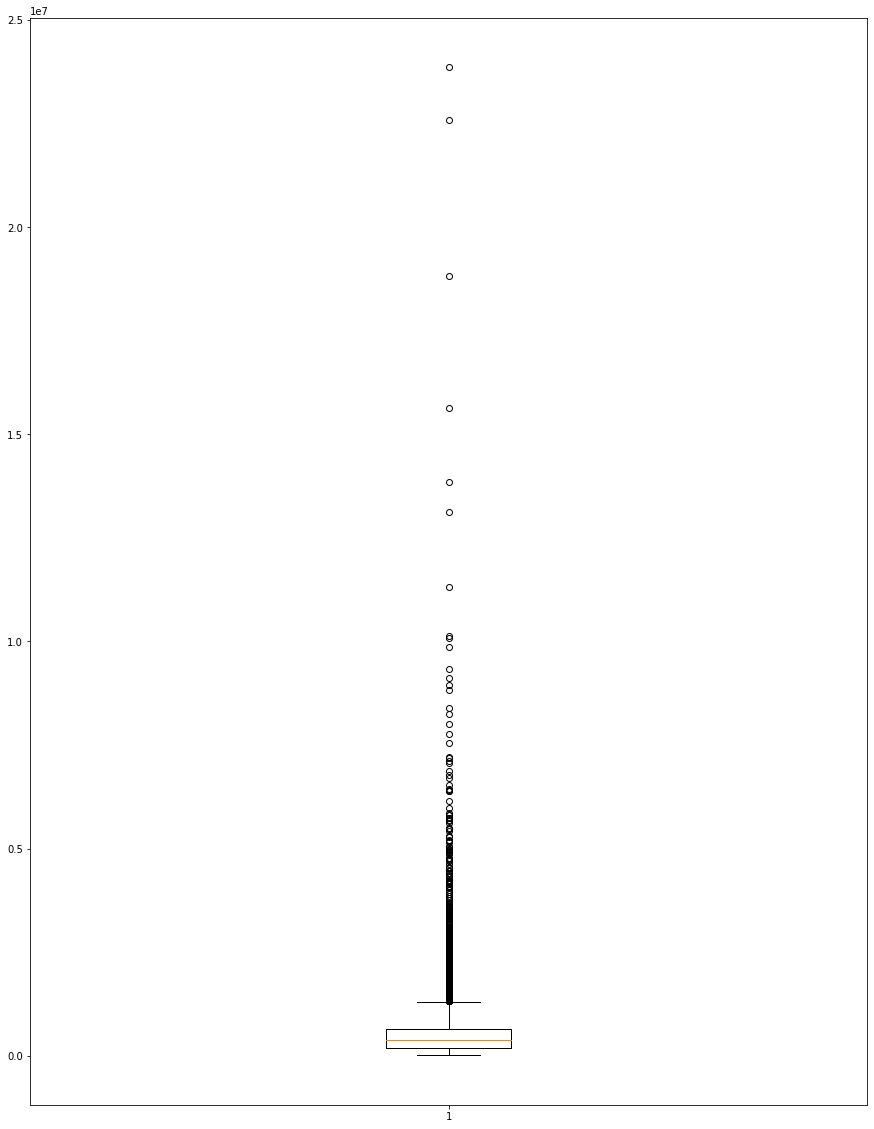

In [16]:
plt.figure(figsize = (15,20))
plt.boxplot(zillow.property_value)
plt.show()

<AxesSubplot:xlabel='property_value'>

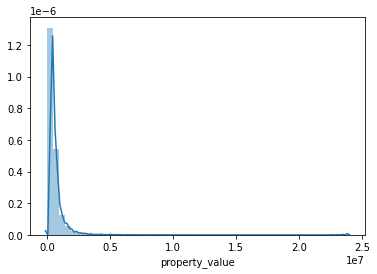

In [17]:
sns.distplot(zillow.property_value)

In [18]:
# there are few outliers in the data. So, we will remove them 

q1 = zillow.property_value.quantile(0.25)
q3 = zillow.property_value.quantile(0.75)

iqr = q3-q1

upper_outlier_mark = q3 + (1.5 * iqr)

zillow = zillow[zillow.property_value < upper_outlier_mark]


zillow

,numberofbathrooms,numberofbedrooms,countyid,zipcode,size_in_squarefeet,fips,fullbath,lotsize,tax,property_value,tax_rate
0,2.0,3.0,3101.0,97318.0,1458.0,6037.0,2.0,8284.0,2319.90,136104.0,1.704505
1,1.0,2.0,3101.0,96018.0,1421.0,6037.0,1.0,6707.0,543.69,35606.0,1.526962
2,3.0,4.0,1286.0,96958.0,2541.0,6059.0,3.0,4975.0,9819.72,880456.0,1.115299
3,2.0,3.0,3101.0,96037.0,1650.0,6037.0,2.0,7300.0,7673.19,614000.0,1.249705
4,1.0,2.0,3101.0,96023.0,693.0,6037.0,1.0,2908.0,3267.47,274237.0,1.191477
...,...,...,...,...,...,...,...,...,...,...,...
15030,3.0,5.0,1286.0,97018.0,2526.0,6059.0,3.0,7800.0,5718.72,458903.0,1.246172
15031,3.0,5.0,1286.0,97067.0,2735.0,6059.0,3.0,7100.0,1465.88,115387.0,1.270403
15032,2.0,3.0,3101.0,96523.0,1536.0,6037.0,2.0,8818.0,3519.78,297097.0,1.184724
15033,3.0,5.0,1286.0,97065.0,2655.0,6059.0,3.0,6000.0,8065.50,746963.0,1.079772


<AxesSubplot:xlabel='property_value'>

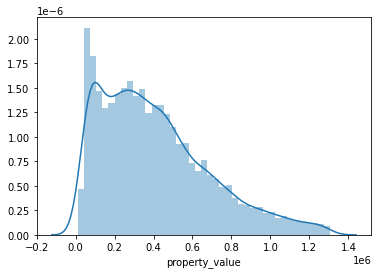

In [19]:
sns.distplot(zillow.property_value)

<AxesSubplot:xlabel='property_value'>

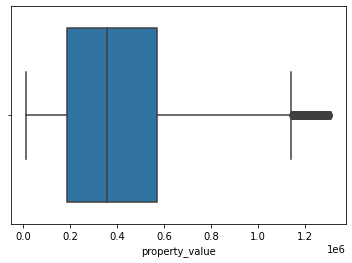

In [20]:
sns.boxplot(zillow.property_value)

#### We can get the fips information from following website
#### https://transition.fcc.gov/oet/info/maps/census/fips/fips.txt
so,

6037: LA, 

6059: Orange,

6111: Ventura

### we will input these values on a separate column


In [21]:
zillow

,numberofbathrooms,numberofbedrooms,countyid,zipcode,size_in_squarefeet,fips,fullbath,lotsize,tax,property_value,tax_rate
0,2.0,3.0,3101.0,97318.0,1458.0,6037.0,2.0,8284.0,2319.90,136104.0,1.704505
1,1.0,2.0,3101.0,96018.0,1421.0,6037.0,1.0,6707.0,543.69,35606.0,1.526962
2,3.0,4.0,1286.0,96958.0,2541.0,6059.0,3.0,4975.0,9819.72,880456.0,1.115299
3,2.0,3.0,3101.0,96037.0,1650.0,6037.0,2.0,7300.0,7673.19,614000.0,1.249705
4,1.0,2.0,3101.0,96023.0,693.0,6037.0,1.0,2908.0,3267.47,274237.0,1.191477
...,...,...,...,...,...,...,...,...,...,...,...
15030,3.0,5.0,1286.0,97018.0,2526.0,6059.0,3.0,7800.0,5718.72,458903.0,1.246172
15031,3.0,5.0,1286.0,97067.0,2735.0,6059.0,3.0,7100.0,1465.88,115387.0,1.270403
15032,2.0,3.0,3101.0,96523.0,1536.0,6037.0,2.0,8818.0,3519.78,297097.0,1.184724
15033,3.0,5.0,1286.0,97065.0,2655.0,6059.0,3.0,6000.0,8065.50,746963.0,1.079772


In [22]:
zillow.fips = zillow.fips.astype(int)



zillow = zillow.replace({'fips':{6037: 'LA', 6059: 'Orange', 6111: 'Ventura'}})

zillow = zillow.rename(columns = {'fips': 'County'})
zillow

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,numberofbathrooms,numberofbedrooms,countyid,zipcode,size_in_squarefeet,County,fullbath,lotsize,tax,property_value,tax_rate
0,2.0,3.0,3101.0,97318.0,1458.0,LA,2.0,8284.0,2319.90,136104.0,1.704505
1,1.0,2.0,3101.0,96018.0,1421.0,LA,1.0,6707.0,543.69,35606.0,1.526962
2,3.0,4.0,1286.0,96958.0,2541.0,Orange,3.0,4975.0,9819.72,880456.0,1.115299
3,2.0,3.0,3101.0,96037.0,1650.0,LA,2.0,7300.0,7673.19,614000.0,1.249705
4,1.0,2.0,3101.0,96023.0,693.0,LA,1.0,2908.0,3267.47,274237.0,1.191477
...,...,...,...,...,...,...,...,...,...,...,...
15030,3.0,5.0,1286.0,97018.0,2526.0,Orange,3.0,7800.0,5718.72,458903.0,1.246172
15031,3.0,5.0,1286.0,97067.0,2735.0,Orange,3.0,7100.0,1465.88,115387.0,1.270403
15032,2.0,3.0,3101.0,96523.0,1536.0,LA,2.0,8818.0,3519.78,297097.0,1.184724
15033,3.0,5.0,1286.0,97065.0,2655.0,Orange,3.0,6000.0,8065.50,746963.0,1.079772


<AxesSubplot:xlabel='County'>

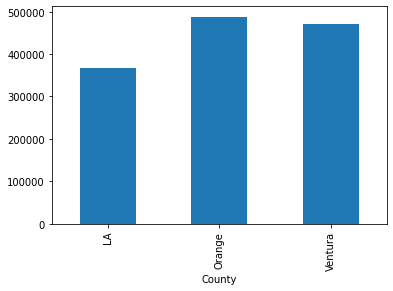

In [23]:
zillow.groupby(zillow.County).property_value.mean().plot(kind = 'bar')

**Hypothesis**

**County influences home value**

$H_0$: There is no relationship between County and home value

$H_a$: County influences home value

$a$: 0.05

In [28]:
# Since we are comparing a categorical and continuous variable, we must use T-test to compare the mean home values
# of different counties

a = 0.05


# from the vizualization above, we can see the home value in LA county is significantly lower, so we will compare the
# mean home value between la county and not la county

x1 = zillow[zillow.County =='LA'].property_value

x2 = zillow[zillow.County !='LA'].property_value


t, p = stats.ttest_ind(x1, x2)

t, p

if (t < 0) and (p < a):
    print('We reject the null hypothesis and the home value in LA county are significantly lower than other counties')
else:
    print('We fail to reject the null hypothesis')


We reject the null hypothesis and the home value in LA county are significantly lower than other counties


In [85]:
dummies = pd.get_dummies(zillow.County)

In [86]:
zillow = pd.concat([zillow, dummies], axis = 1)

In [87]:
zillow = zillow.drop(columns = 'County')

In [88]:
zillow.sort_values(by = 'numberofbedrooms', ascending = True)

,numberofbathrooms,numberofbedrooms,countyid,zipcode,size_in_squarefeet,fullbath,lotsize,tax,property_value,tax_rate,LA,Orange,Ventura
187,1.0,0.0,3101.0,95993.0,740.0,1.0,28817.0,2399.69,188000.0,1.276431,1,0,0
3048,1.0,0.0,3101.0,95995.0,890.0,1.0,7339.0,1307.77,100000.0,1.307770,1,0,0
10580,1.0,1.0,1286.0,96969.0,480.0,1.0,2840.0,10822.90,989868.0,1.093368,0,1,0
14433,2.0,1.0,3101.0,96006.0,874.0,2.0,6489.0,3187.25,257034.0,1.240011,1,0,0
9539,1.0,1.0,3101.0,95997.0,865.0,1.0,2090.0,5482.71,450000.0,1.218380,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8737,2.0,7.0,3101.0,96014.0,2648.0,2.0,6497.0,3501.94,267010.0,1.311539,1,0,0
13079,4.0,7.0,3101.0,96230.0,2769.0,4.0,6219.0,5594.97,419806.0,1.332751,1,0,0
11119,3.0,8.0,3101.0,96387.0,3308.0,3.0,19827.0,11795.09,966530.0,1.220354,1,0,0
12132,10.0,10.0,3101.0,96339.0,4294.0,10.0,16695.0,8871.35,812200.0,1.092262,1,0,0


In [89]:
zillow = zillow[zillow.numberofbedrooms<8]

In [90]:
zillow = zillow[zillow.numberofbathrooms < 7]

In [91]:
zillow = zillow[zillow.numberofbedrooms!=0]

In [92]:
zillow

,numberofbathrooms,numberofbedrooms,countyid,zipcode,size_in_squarefeet,fullbath,lotsize,tax,property_value,tax_rate,LA,Orange,Ventura
0,2.0,3.0,3101.0,97318.0,1458.0,2.0,8284.0,2319.90,136104.0,1.704505,1,0,0
1,1.0,2.0,3101.0,96018.0,1421.0,1.0,6707.0,543.69,35606.0,1.526962,1,0,0
2,3.0,4.0,1286.0,96958.0,2541.0,3.0,4975.0,9819.72,880456.0,1.115299,0,1,0
3,2.0,3.0,3101.0,96037.0,1650.0,2.0,7300.0,7673.19,614000.0,1.249705,1,0,0
4,1.0,2.0,3101.0,96023.0,693.0,1.0,2908.0,3267.47,274237.0,1.191477,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15030,3.0,5.0,1286.0,97018.0,2526.0,3.0,7800.0,5718.72,458903.0,1.246172,0,1,0
15031,3.0,5.0,1286.0,97067.0,2735.0,3.0,7100.0,1465.88,115387.0,1.270403,0,1,0
15032,2.0,3.0,3101.0,96523.0,1536.0,2.0,8818.0,3519.78,297097.0,1.184724,1,0,0
15033,3.0,5.0,1286.0,97065.0,2655.0,3.0,6000.0,8065.50,746963.0,1.079772,0,1,0


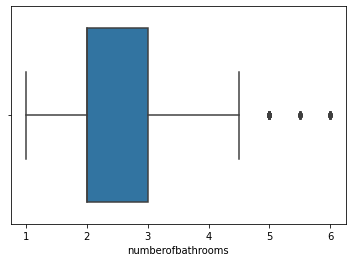

<AxesSubplot:xlabel='numberofbedrooms'>

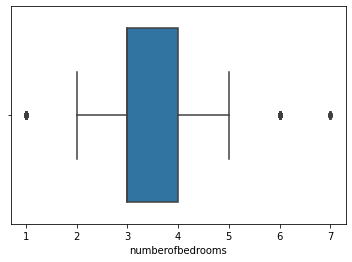

In [93]:
sns.boxplot(zillow.numberofbathrooms)
plt.show()

sns.boxplot(zillow.numberofbedrooms)

In [94]:
zillow.groupby(zillow.numberofbathrooms).numberofbathrooms.value_counts()

numberofbathrooms  numberofbathrooms
1.0                1.0                  2574
1.5                1.5                   234
2.0                2.0                  6035
2.5                2.5                  1128
3.0                3.0                  2899
3.5                3.5                   234
4.0                4.0                   474
4.5                4.5                   120
5.0                5.0                   113
5.5                5.5                    16
6.0                6.0                    20
Name: numberofbathrooms, dtype: int64

In [95]:
zillow.groupby(zillow.numberofbedrooms).numberofbedrooms.value_counts()

numberofbedrooms  numberofbedrooms
1.0               1.0                  160
2.0               2.0                 2252
3.0               3.0                 6369
4.0               4.0                 4021
5.0               5.0                  907
6.0               6.0                  123
7.0               7.0                   15
Name: numberofbedrooms, dtype: int64

In [96]:
zillow = zillow.drop(columns = 'tax_rate')


train, test, validate = wrangle.split_data(zillow)

In [97]:
train.shape, test.shape, validate.shape

train

,numberofbathrooms,numberofbedrooms,countyid,zipcode,size_in_squarefeet,fullbath,lotsize,tax,property_value,LA,Orange,Ventura
257,2.5,4.0,1286.0,96185.0,1748.0,2.0,1818.0,5528.32,462904.0,0,1,0
7236,3.0,4.0,1286.0,97021.0,2568.0,3.0,15000.0,1566.96,116222.0,0,1,0
12343,2.0,4.0,1286.0,96965.0,1480.0,2.0,6636.0,7255.96,649760.0,0,1,0
12,2.0,3.0,3101.0,96489.0,1632.0,2.0,6040.0,5921.67,499402.0,1,0,0
3975,2.0,3.0,3101.0,97328.0,1085.0,2.0,10129.0,3111.71,178000.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8519,3.0,3.0,2061.0,97089.0,2626.0,3.0,27345.0,11745.14,1076000.0,0,0,1
6906,2.0,2.0,3101.0,96446.0,1377.0,2.0,6616.0,5926.11,485119.0,1,0,0
6465,3.5,3.0,1286.0,96993.0,3352.0,3.0,8312.0,9634.36,668005.0,0,1,0
14093,3.0,3.0,1286.0,96996.0,1680.0,3.0,4500.0,6567.24,635546.0,0,1,0


## Exploration Phase

<Figure size 1080x1080 with 0 Axes>

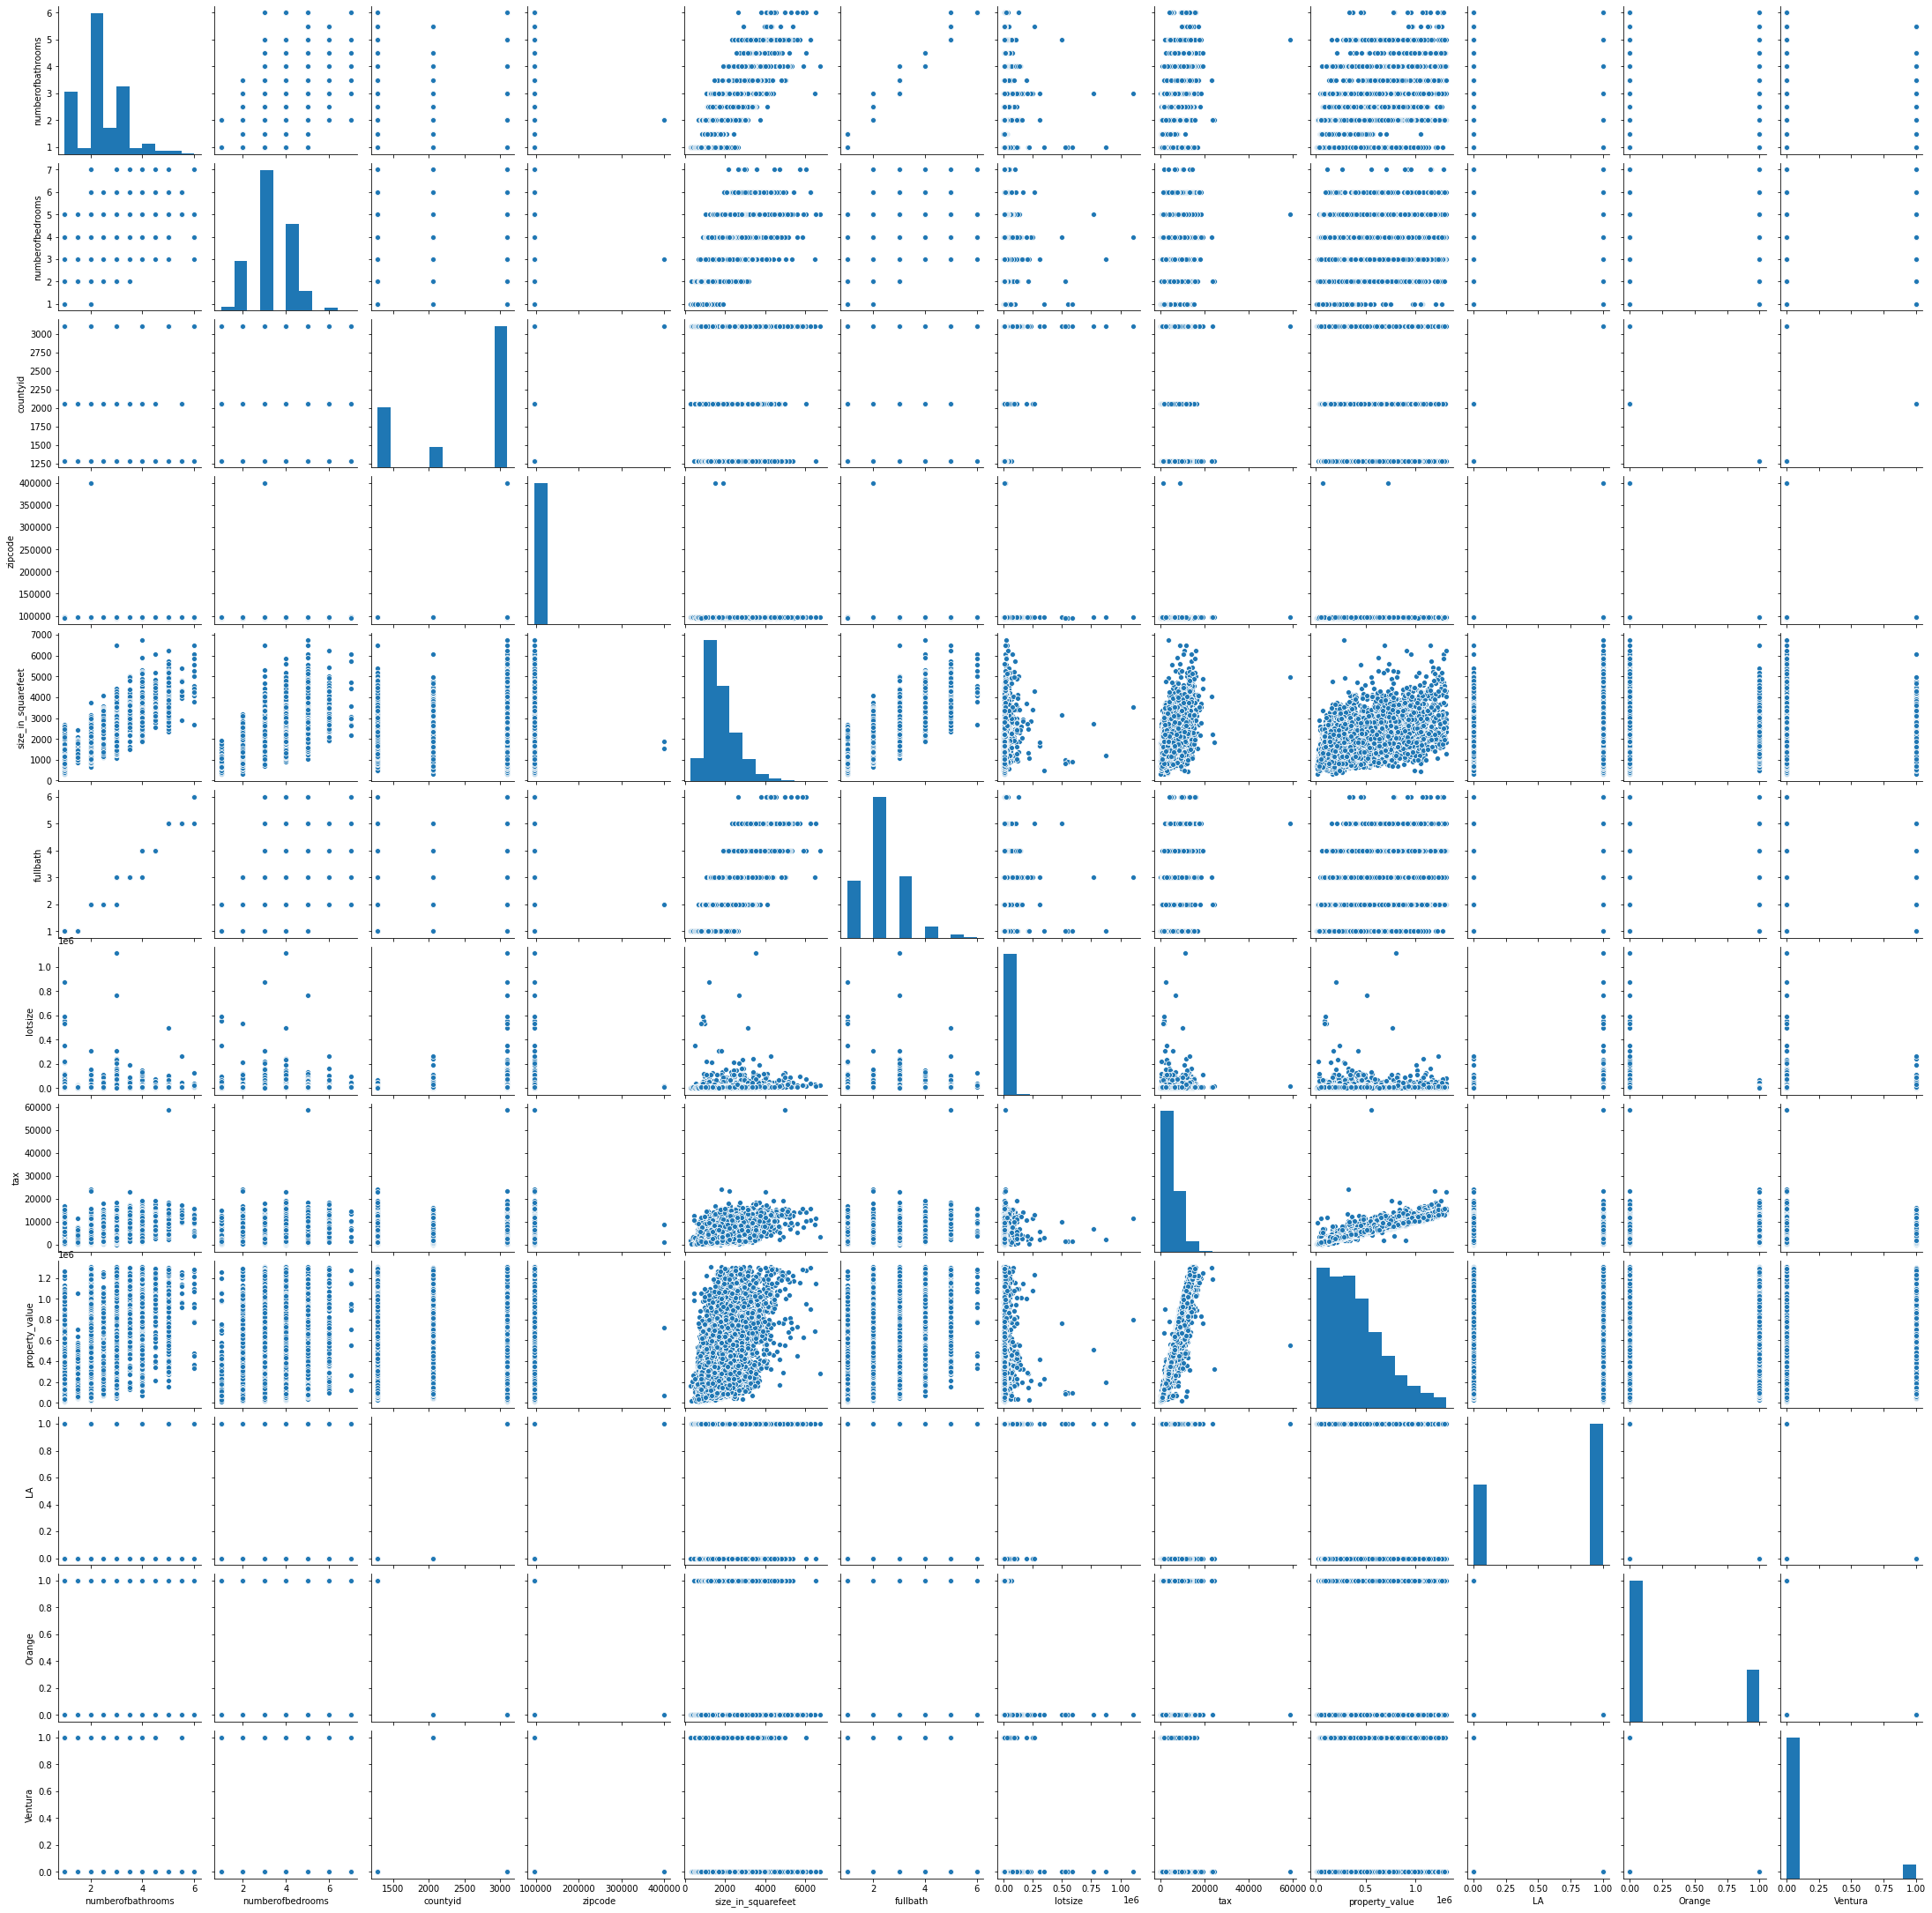

In [98]:
plt.figure(figsize = (15,15))

sns.pairplot(train)

<AxesSubplot:>

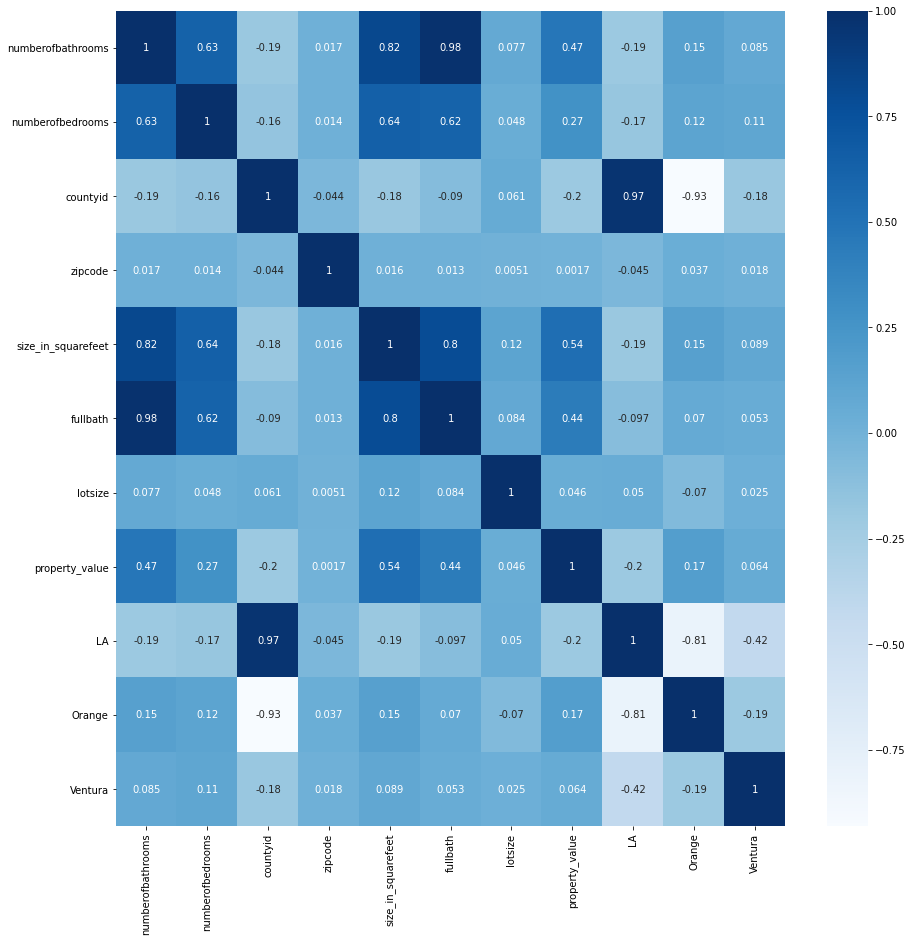

In [99]:

# lets plot a heat map of the correlation


plt.figure(figsize = (15,15))

sns.heatmap(train.drop(columns = [ 'tax']).corr(), cmap = 'Blues', annot = True)

### Takeaways:
- We can see a strong correlation between property value and full bath count, size in square feet, number of bathrooms, and number of bedrooms

### Hypothesis

**1. size of the single family unit in square feet affect the price of the property**

- both of these variables are continuous so, we must conduct pearson r hypothesis test

$H_0$: The size in square feet and the price of the property are independent of each other

$H_a$: The size in square feet and the price of the property are dependent of each other

In [100]:
from scipy import stats

In [101]:
# setting our significance level

a = 0.05

r, p = stats.pearsonr(train.size_in_squarefeet, train.property_value)

r, p

(0.5379912262795885, 0.0)

In [102]:
if p < a:
    print("We reject the null hypothesis")
else:
    print('we fail to reject the null hypothesis')

We reject the null hypothesis


### Takeaways:
- our p is low so we reject the null hypothesis that size in square feet and property value are independent of each other
- our r value os 0.53, indicating a correlation

<AxesSubplot:xlabel='numberofbathrooms'>

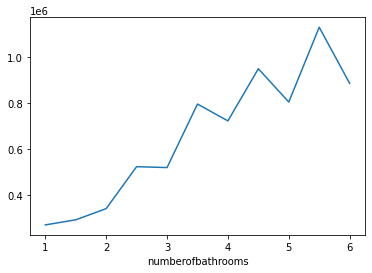

In [103]:
train.groupby(train.numberofbathrooms).property_value.mean().plot()

<AxesSubplot:xlabel='numberofbedrooms'>

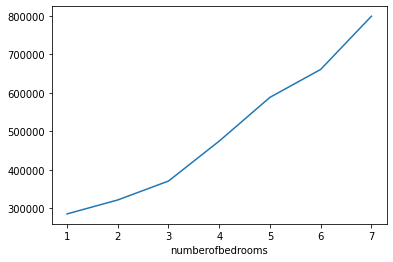

In [104]:
train.groupby(train.numberofbedrooms).property_value.mean().plot()

**the number of bedrooms has a strong relationship with the price of homes**

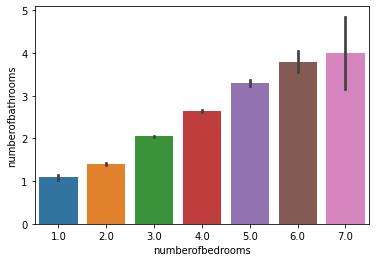

In [106]:
sns.barplot(data = train, y = 'numberofbathrooms', x = 'numberofbedrooms')
plt.show()

In [40]:
train.groupby(train.numberofbathrooms).numberofbathrooms.value_counts()

numberofbathrooms  numberofbathrooms
1.0                1.0                  1659
1.5                1.5                   156
2.0                2.0                  3860
2.5                2.5                   733
3.0                3.0                  1862
3.5                3.5                   156
4.0                4.0                   291
4.5                4.5                    67
5.0                5.0                    61
5.5                5.5                     8
6.0                6.0                    13
7.0                7.0                     2
8.0                8.0                     1
10.0               10.0                    1
Name: numberofbathrooms, dtype: int64

<AxesSubplot:xlabel='numberofbathrooms'>

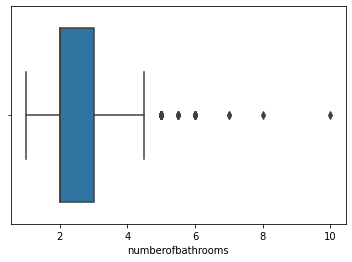

In [41]:
sns.boxplot(train.numberofbathrooms)

## Modeling
**Lets scale the data first**

In [427]:
from sklearn.preprocessing import MinMaxScaler

In [428]:
x_train = train.drop(columns = ['tax', 'property_value'])
y_train = train[['property_value']]

x_validate = validate.drop(columns = ['tax', 'property_value'])
y_validate = validate[['property_value']]


x_test = test.drop(columns = ['tax', 'property_value'])
y_test = test[['property_value']]

In [429]:
scaler = MinMaxScaler()

cols_to_scale = x_train.columns

x_train_scaled, x_test_scaled, x_validate_scaled = wrangle.scale_data(x_train, x_test, x_validate, scaler = scaler,
                                                                      cols_to_scale = cols_to_scale)

In [430]:
x_train_scaled

,numberofbathrooms_scaled,numberofbedrooms_scaled,countyid_scaled,zipcode_scaled,size_in_squarefeet_scaled,fullbath_scaled,lotsize_scaled,LA_scaled,Orange_scaled,Ventura_scaled
12861,0.111111,0.3,1.000000,0.989721,0.177059,0.111111,0.006038,1.0,0.0,0.0
12534,0.000000,0.2,1.000000,0.263583,0.079169,0.000000,0.005723,1.0,0.0,0.0
9135,0.222222,0.5,0.000000,0.777533,0.436300,0.222222,0.014925,0.0,1.0,0.0
8372,0.111111,0.5,0.426997,0.834068,0.276059,0.111111,0.006689,0.0,0.0,1.0
14324,0.111111,0.3,1.000000,0.283407,0.165477,0.111111,0.006220,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
7969,0.000000,0.3,1.000000,0.343612,0.149453,0.000000,0.005269,1.0,0.0,0.0
14530,0.111111,0.3,1.000000,0.981645,0.177059,0.111111,0.005573,1.0,0.0,0.0
13075,0.000000,0.2,0.000000,0.736417,0.124068,0.000000,0.002304,0.0,1.0,0.0
2575,0.111111,0.2,1.000000,0.988987,0.209265,0.111111,0.099817,1.0,0.0,0.0


In [457]:
print(train[train.LA == 1].property_value.mean())

print(train[train.Orange == 1].property_value.mean())

print(train[train.Ventura == 1].property_value.mean())

365672.3332156101
490387.552852349
470792.4362089915


In [458]:
print(train[train.LA == 1].property_value.min())

print(train[train.Orange == 1].property_value.min())

print(train[train.Ventura == 1].property_value.min())

14284.0
26372.0
35121.0


In [459]:
print(train[train.LA == 1].property_value.median())

print(train[train.Orange == 1].property_value.median())

print(train[train.Ventura == 1].property_value.median())

303025.0
456550.0
440098.0


### Lets build model

In [431]:
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.linear_model import LinearRegression, LassoLars
from sklearn.preprocessing import PolynomialFeatures

from sklearn.feature_selection import RFE

### Baseline First

In [432]:
y_train.median()

property_value    355708.0
dtype: float64

In [433]:
## we will use the median as our baseline

baseline = y_train.median()


# predicting using our baseline
y_baseline_pred = np.full(len(y_train), baseline)

baseline_rmse = (mean_squared_error(y_train, y_baseline_pred)) ** (1/2)

baseline_rmse

286897.9405724805

In [434]:
x_vars = x_train_scaled[['numberofbathrooms_scaled', 'numberofbedrooms_scaled', 'size_in_squarefeet_scaled']]

x_vars

,numberofbathrooms_scaled,numberofbedrooms_scaled,size_in_squarefeet_scaled
12861,0.111111,0.3,0.177059
12534,0.000000,0.2,0.079169
9135,0.222222,0.5,0.436300
8372,0.111111,0.5,0.276059
14324,0.111111,0.3,0.165477
...,...,...,...
7969,0.000000,0.3,0.149453
14530,0.111111,0.3,0.177059
13075,0.000000,0.2,0.124068
2575,0.111111,0.2,0.209265


### Linear Regression Model

In [435]:
lm = LinearRegression(normalize = True)
lm = lm.fit(x_vars, y_train)

y_lm_pred = lm.predict(x_vars)

lm_rmse = (mean_squared_error(y_train, y_lm_pred)) **(1/2)

lm_rmse

235283.4069439139

In [436]:
xvs_lm = explained_variance_score(y_train, y_lm_pred)
xvs_lm

0.3034606592174053

### LassoLars

In [437]:
# create the object
lars = LassoLars(alpha = 0)


# fit the object
lars = lars.fit(x_vars, y_train)


# predict with the object
y_lars_pred = lars.predict(x_vars)


# calculate the rmse
lars_rmse = (mean_squared_error(y_train, y_lars_pred)) **(1/2)

lars_rmse

235283.4069439139

In [438]:
xvs_lars = explained_variance_score(y_train, y_lars_pred)
xvs_lars

0.3034606592174053

### Polynomial + Linear Reg

In [440]:
# lets try polynomial features with linear regression


# create polynomial object
pf = PolynomialFeatures(degree = 2)

# fitting the object
pf = pf.fit(x_vars)


# transforming our training data set
x_vars_squared = pf.transform(x_vars)



# lets get the Linear Regression

lm_squared = LinearRegression()


# fit the linear regression object

lm_squared = lm_squared.fit(x_vars_squared, y_train)

#predict with the object

y_lm_squared_pred = lm_squared.predict(x_vars_squared)


# lets get rmse

lm_squared_rmse = (mean_squared_error(y_train, y_lm_squared_pred)) **(1/2)

lm_squared_rmse

235113.82690913675

In [441]:
xvs_lm_squared = explained_variance_score(y_train, y_lm_squared_pred)
xvs_lm_squared

0.3044643559939322

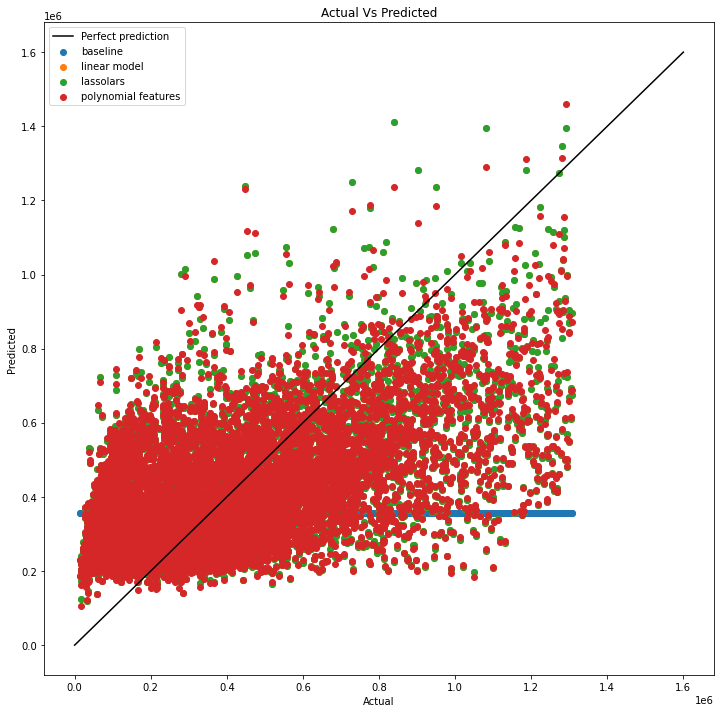

In [442]:
# lets try to plot these values

plt.figure(figsize = (12,12))
plt.scatter(y_train, y_baseline_pred, label = 'baseline')

plt.scatter(y_train, y_lm_pred, label = 'linear model')

plt.scatter(y_train, y_lars_pred, label = 'lassolars')


plt.scatter(y_train, y_lm_squared_pred, label = 'polynomial features')

plt.plot([0, 1600000], [0, 1600000], ls = "-" , c = 'black', label = 'Perfect prediction')

plt.xlabel("Actual")

plt.ylabel("Predicted")

plt.title('Actual Vs Predicted')

plt.legend()

plt.show()

## Linear Regression

In [444]:
## Lets try to use all the variables this time


# create the object

lm2 = LinearRegression(normalize = True)


# fit the object

lm2 = lm2.fit(x_train_scaled, y_train)


# predict with the object

y_lm2_pred = lm2.predict(x_train_scaled)


# rmse

lm2_rmse = (mean_squared_error(y_train, y_lm2_pred)) **(1/2)

lm2_rmse

227646.90380860088

In [445]:
xvs_lm2 = explained_variance_score(y_train, y_lm2_pred)
xvs_lm2

0.3479446017857011

## LassoLars


In [446]:
# create the object
lars2 = LassoLars(alpha = 0)


# fit the object
lars2 = lars2.fit(x_train_scaled, y_train)


# predict with the object
y_lars2_pred = lars2.predict(x_train_scaled)


# calculate the rmse
lars2_rmse = (mean_squared_error(y_train, y_lars2_pred)) **(1/2)

lars2_rmse

227637.85558494102

In [447]:
xvs_lars2 = explained_variance_score(y_train, y_lars2_pred)
xvs_lars2

0.34799335532609665

## Polynomial Features + Linear Reg

In [449]:
# create polynomial object
pf2 = PolynomialFeatures(degree = 2)

# fitting the object
pf2 = pf2.fit(x_train_scaled)


# transforming our training data set
x_train_scaled_squared = pf2.transform(x_train_scaled)



# lets get the Linear Regression

lm_squared2 = LinearRegression()


# fit the linear regression object

lm_squared2 = lm_squared2.fit(x_train_scaled_squared, y_train)

#predict with the object

y_lm_squared2_pred = lm_squared2.predict(x_train_scaled_squared)


# lets get rmse

lm_squared2_rmse = (mean_squared_error(y_train, y_lm_squared2_pred)) **(1/2)

lm_squared2_rmse

223539.4619446724

In [450]:
xvs_lm_squared2 = explained_variance_score(y_train, y_lm_squared2_pred)
xvs_lm_squared2

0.37125948835559786

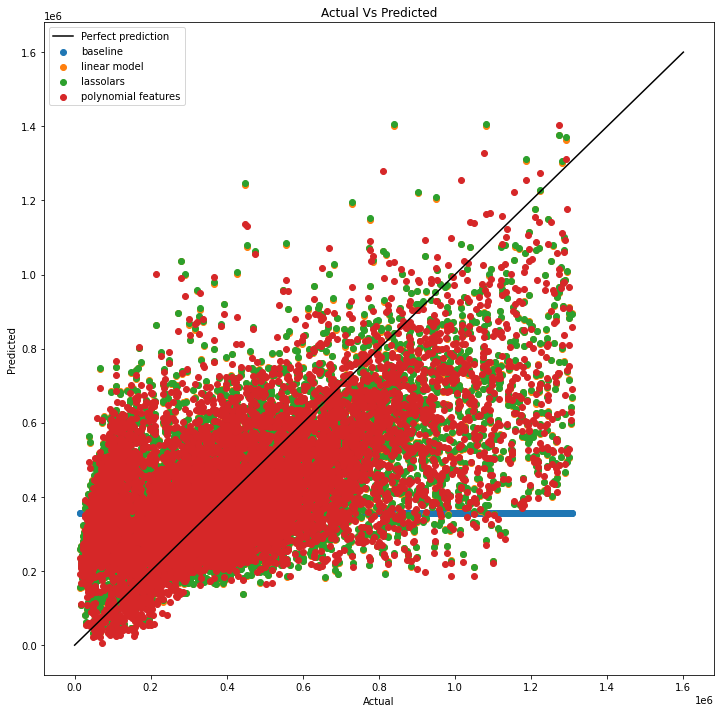

In [451]:
# lets try to plot these values

plt.figure(figsize = (12,12))
plt.scatter(y_train, y_baseline_pred, label = 'baseline')

plt.scatter(y_train, y_lm2_pred, label = 'linear model')

plt.scatter(y_train, y_lars2_pred, label = 'lassolars')


plt.scatter(y_train, y_lm_squared2_pred, label = 'polynomial features')

plt.plot([0, 1600000], [0, 1600000], ls = "-" , c = 'black', label = 'Perfect prediction')

plt.xlabel("Actual")

plt.ylabel("Predicted")

plt.title('Actual Vs Predicted')

plt.legend()

plt.show()

In [490]:
# lets try the variables picked by our RFE

x_var = x_train_scaled[['numberofbathrooms_scaled', 'size_in_squarefeet_scaled','LA_scaled', 'Orange_scaled', 'Ventura_scaled']]
y_train

,property_value
12861,192897.0
12534,49404.0
9135,473431.0
8372,119648.0
14324,226225.0
...,...
7969,61248.0
14530,198000.0
13075,50941.0
2575,340000.0


In [491]:
lm3 = LinearRegression(normalize = True)

In [492]:
lm3 = lm3.fit(x_var, y_train)

In [493]:
y_lm3_pred = lm3.predict(x_var)

In [494]:
lm3_rmse = (mean_squared_error(y_train, y_lm3_pred))**(1/2)

lm3_rmse

235907.35759637848

In [495]:
# create polynomial object
pf3 = PolynomialFeatures(degree = 2)

# fitting the object
pf3 = pf3.fit(x_var)


# transforming our training data set
x_var_squared = pf3.transform(x_var)



# lets get the Linear Regression

lm_squared3 = LinearRegression()


# fit the linear regression object

lm_squared3 = lm_squared3.fit(x_var_squared, y_train)

#predict with the object

y_lm_squared3_pred = lm_squared3.predict(x_var_squared)


# lets get rmse

lm_squared3_rmse = (mean_squared_error(y_train, y_lm_squared3_pred)) **(1/2)

lm_squared3_rmse

234505.23234060392

## We will validate with all of our model

In [499]:
# Validating with linear regression model
y_validate = validate[['property_value']]


x_validate_vars = x_validate_scaled[['numberofbathrooms_scaled', 'numberofbedrooms_scaled', 
                                     'size_in_squarefeet_scaled']]

y_validate_lm_pred = lm.predict(x_validate_vars)


val_lm_rmse = (mean_squared_error(y_validate, y_validate_lm_pred)) ** (1/2)

val_lm_rmse

230387.5641013898

In [501]:
# validate with lassolars

y_validate_lars_pred = lars.predict(x_validate_vars)


val_lars_rmse = (mean_squared_error(y_validate, y_validate_lars_pred)) ** (1/2)

val_lars_rmse

230387.5641013898

In [502]:
# lets try polynomial features with linear regression





# transforming our validate data set
x_val_vars_squared = pf.transform(x_validate_vars)










#predict with the object

y_val_lm_squared_pred = lm_squared.predict(x_val_vars_squared)


# lets get rmse

lm_squared_val_rmse = (mean_squared_error(y_validate, y_val_lm_squared_pred)) **(1/2)

lm_squared_val_rmse

229759.3410208191

In [506]:
xvs_val = explained_variance_score(y_validate, y_val_lm_squared_pred )

xvs_val

0.3159419935155122

## Our polynomial feature + linear reg model with 2nd degree performed better with our validate data
**So we will use this to run on our test data**


In [503]:
y_test = test[['property_value']]


x_test_vars = x_test_scaled[['numberofbathrooms_scaled', 'numberofbedrooms_scaled', 
                                     'size_in_squarefeet_scaled']]

In [504]:
# transforming our validate data set
x_test_vars_squared = pf.transform(x_test_vars)










#predict with the object

y_test_lm_squared_pred = lm_squared.predict(x_test_vars_squared)


# lets get rmse

lm_squared_test_rmse = (mean_squared_error(y_test, y_test_lm_squared_pred)) **(1/2)

lm_squared_test_rmse

241553.1240366546

In [505]:
xvs_lm_squared_test = explained_variance_score(y_test, y_test_lm_squared_pred )
xvs_lm_squared_test

0.27815792942311124

**Model did terrible with test data**